In [925]:
## import the libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

## libraries for ANN
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [831]:
## warning
import warnings
warnings.filterwarnings('ignore')

In [832]:
## load dataset
df = pd.read_csv('heartfail.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [833]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [834]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [835]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [836]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [837]:
df.shape

(299, 13)

Data Filtering

Check for Null Values

In [838]:
#df.isnull()
#df.isnull().sum()
df.isnull().sum()/len(df)*100

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

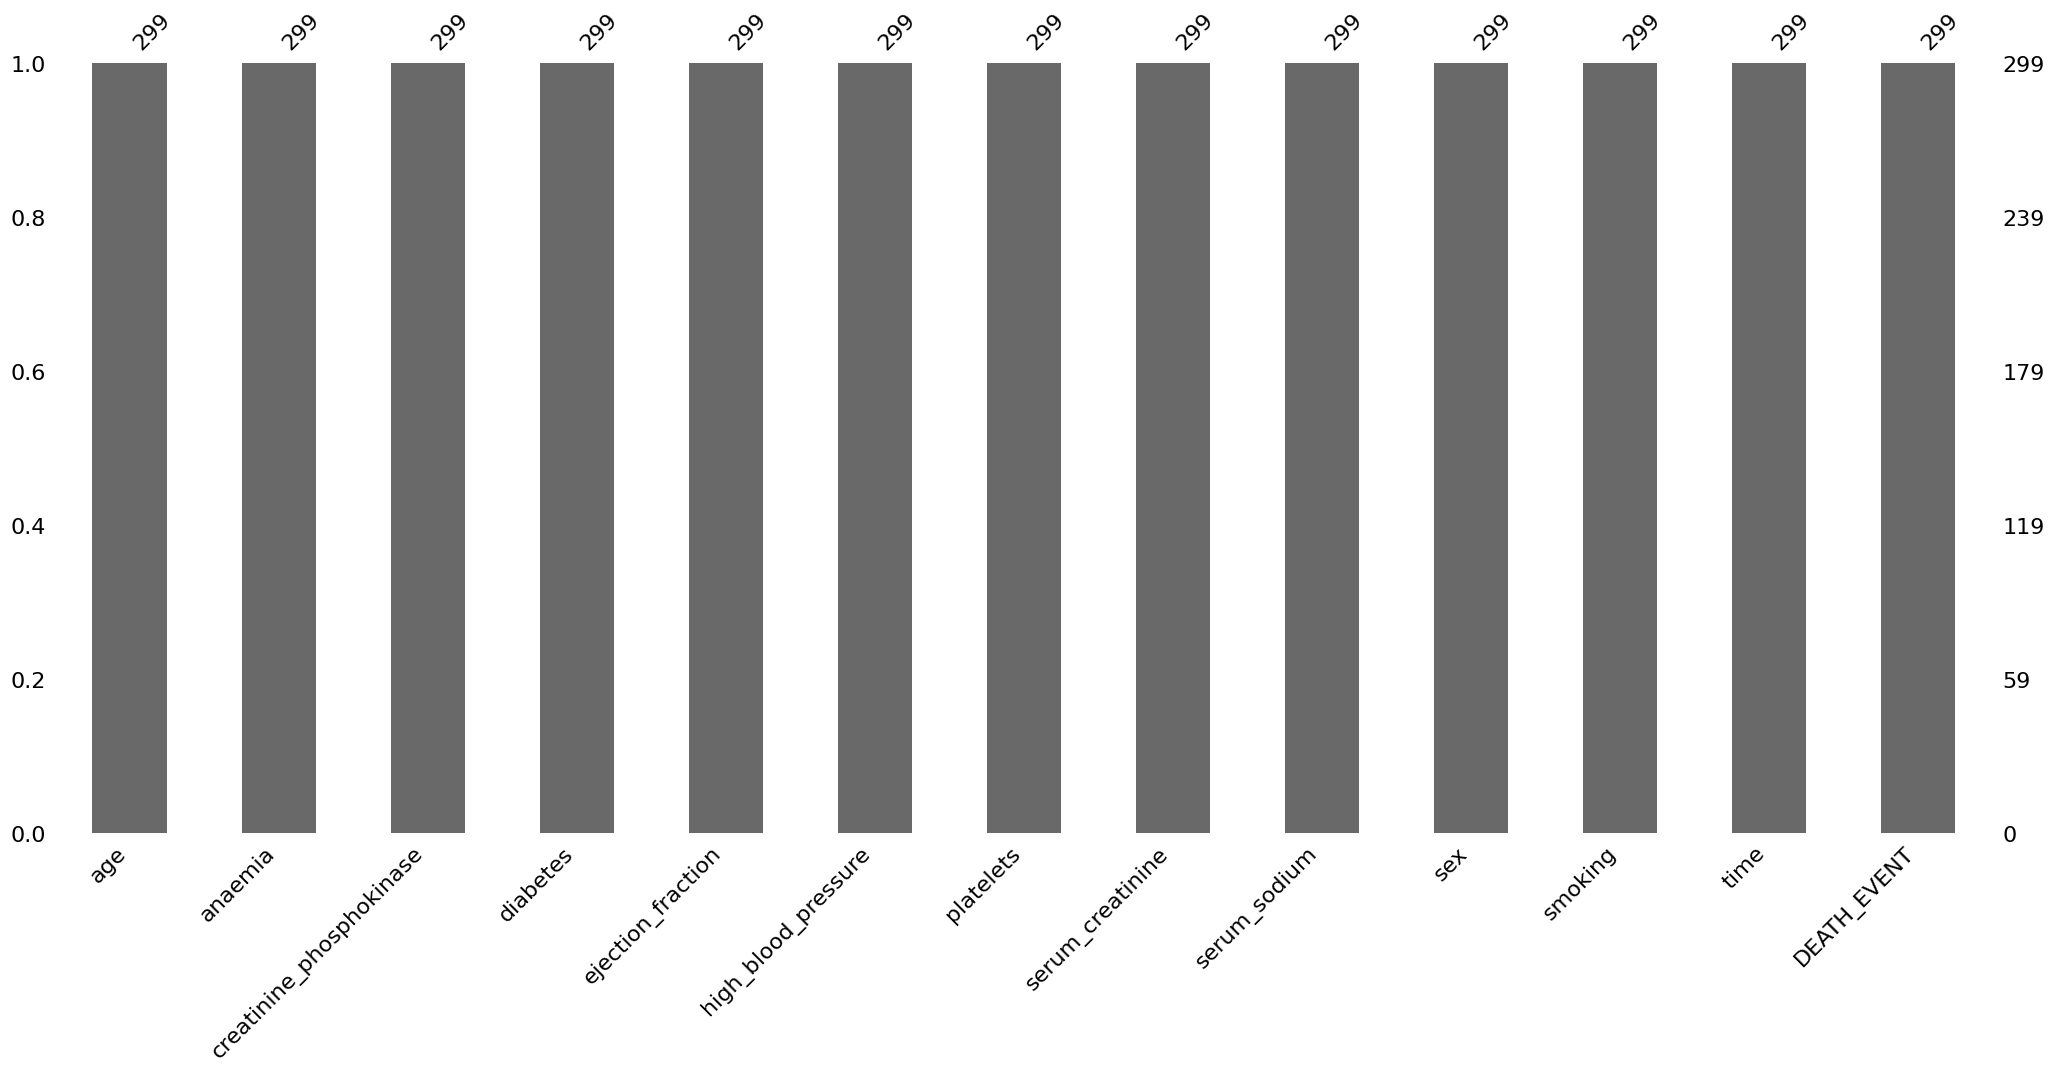

In [839]:
msno.bar(df)
plt.show()

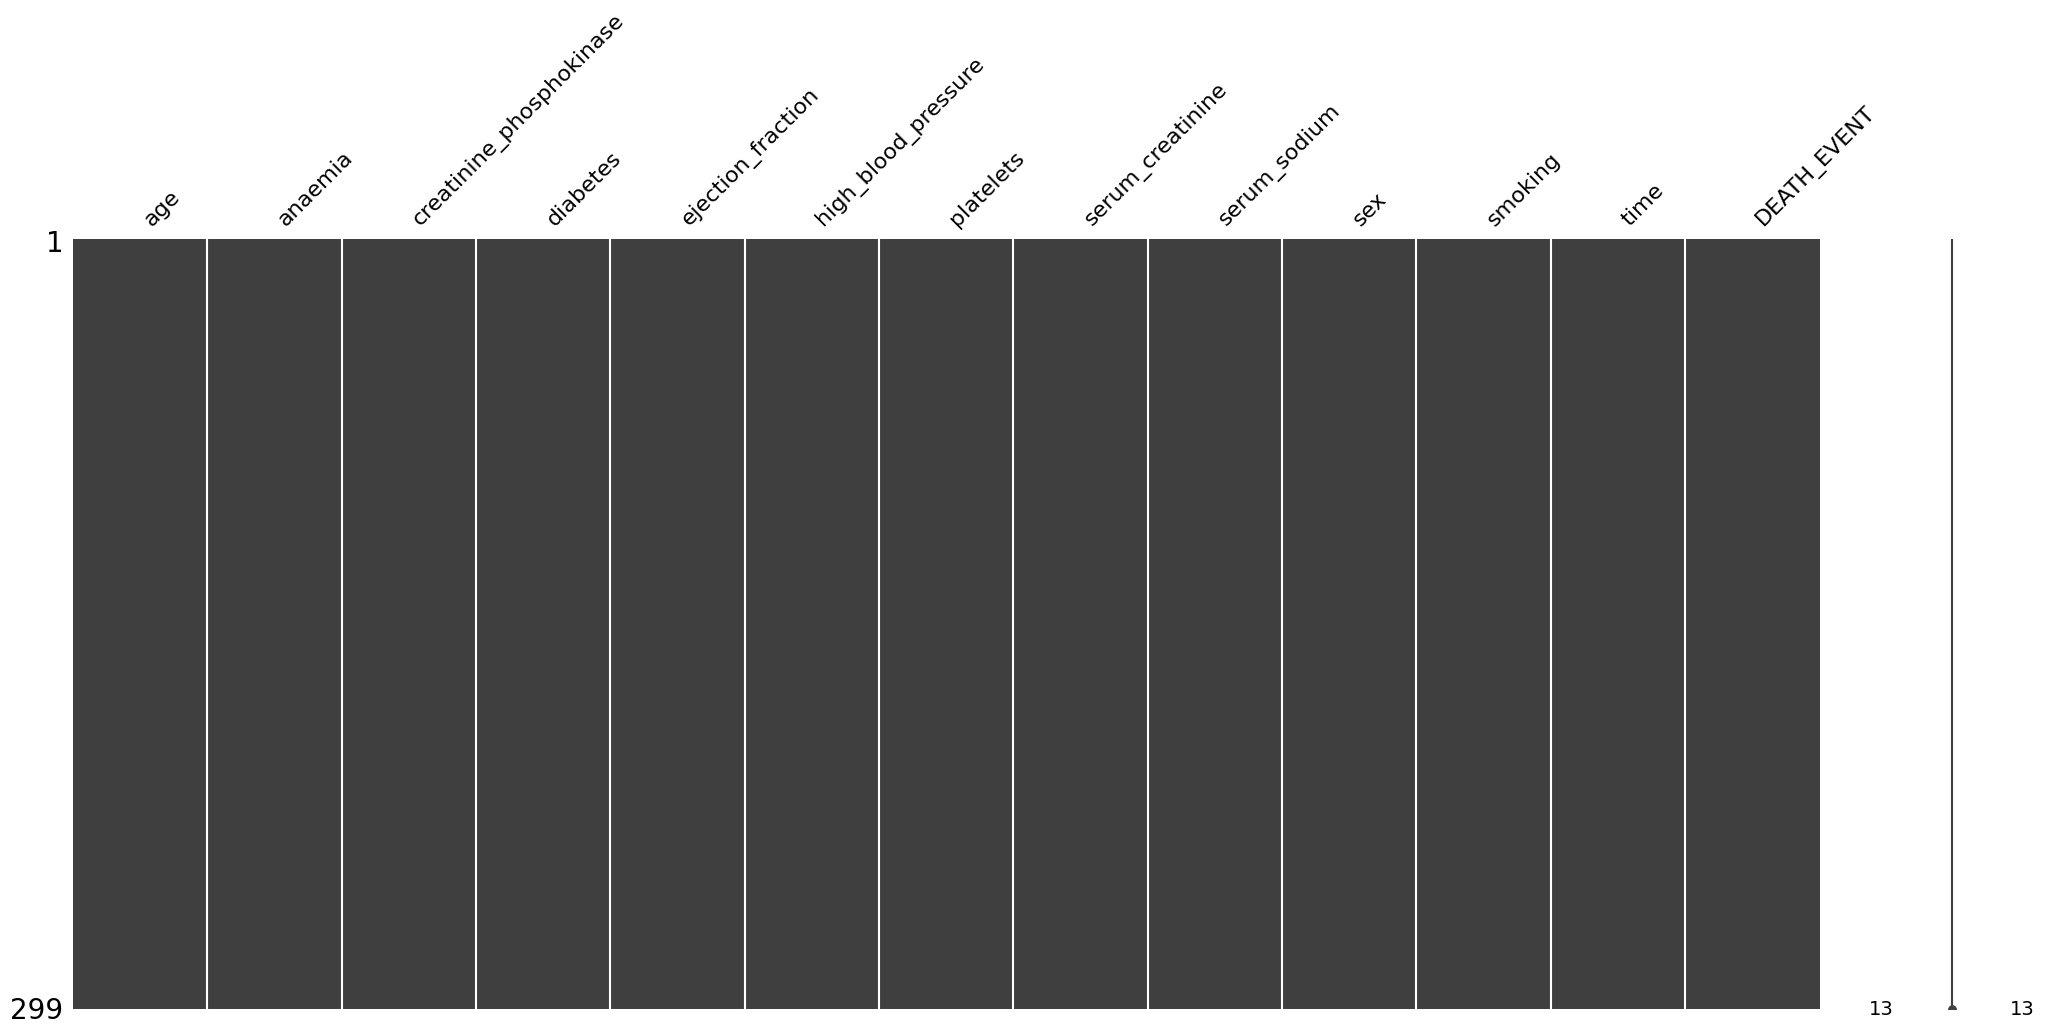

In [840]:
msno.matrix(df)
plt.show()

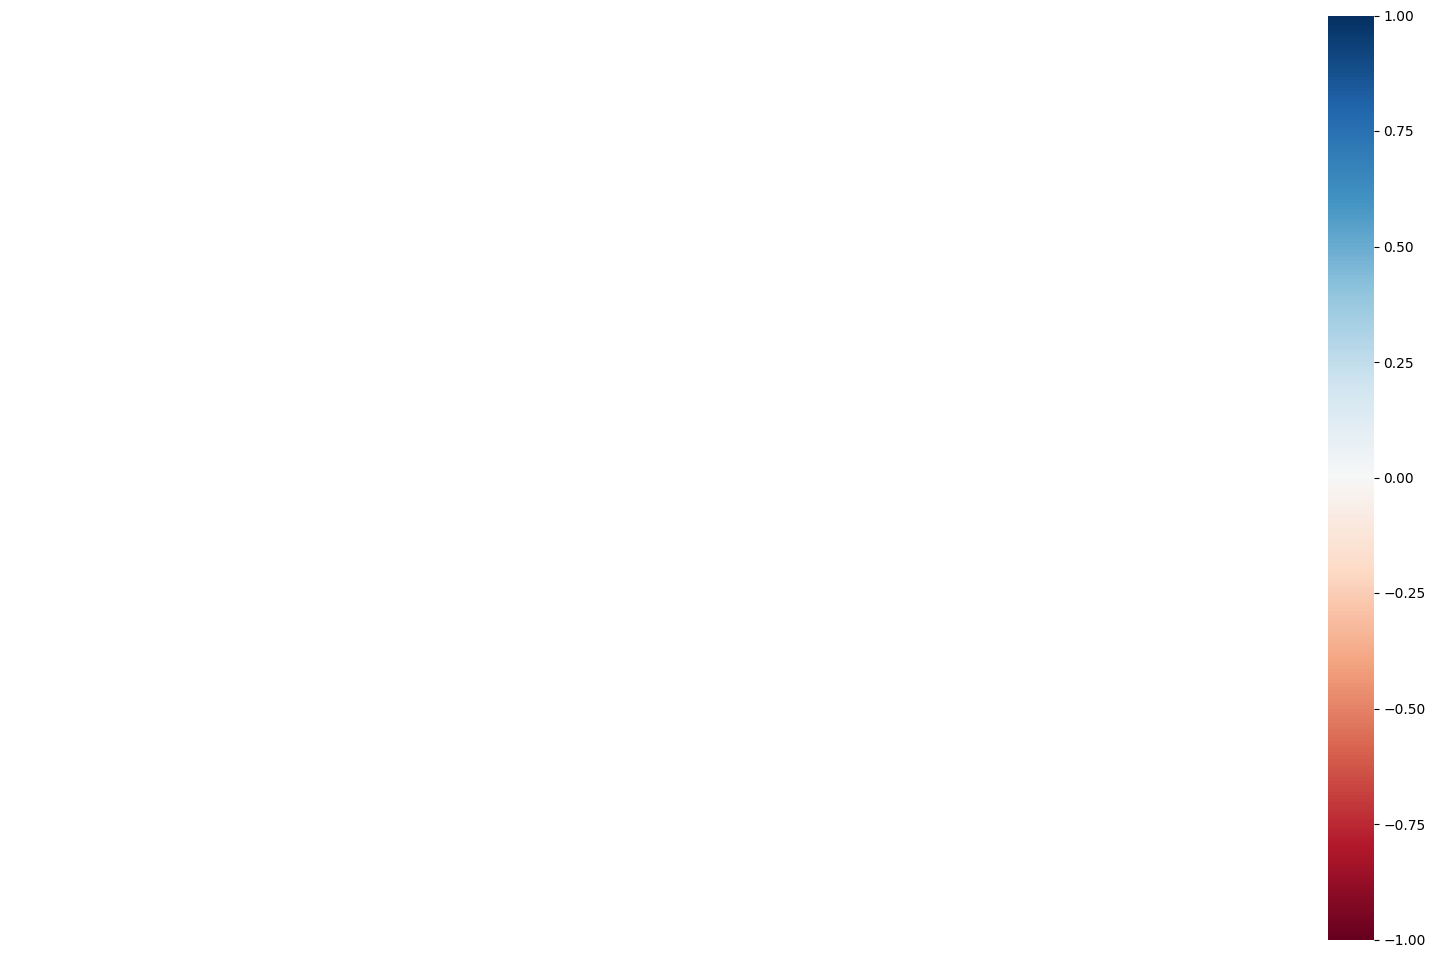

In [841]:
# One feature missing to another
msno.heatmap(df)
plt.show()

Check for Duplicates

In [842]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool

In [843]:
df.duplicated().sum()

0

Data Transformation

In [844]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [845]:
#No need to transform data to numerical values in this dataset


Data Exploration

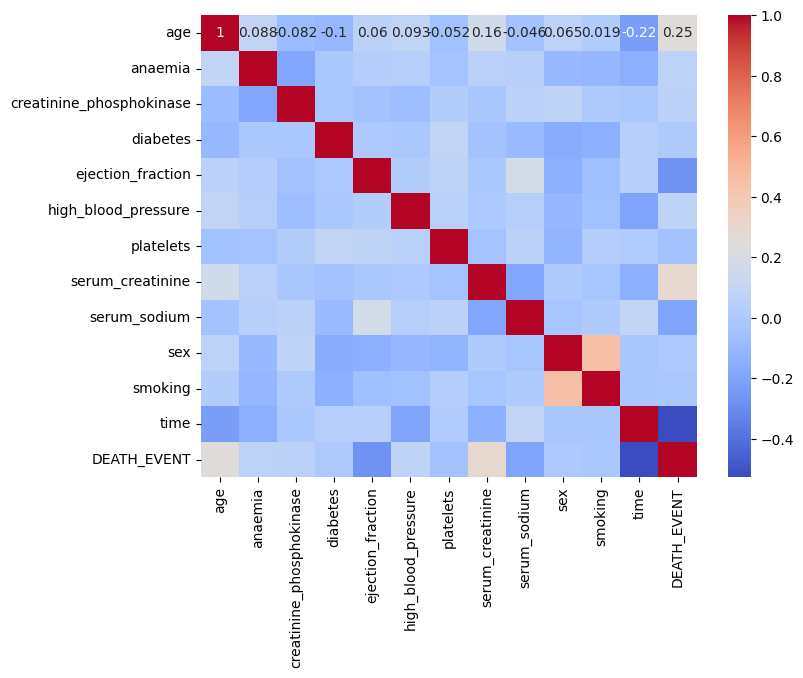

In [846]:
# Create a heatmap

corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [847]:
df.groupby('sex').mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
sex,,,,,,,,,,,,
0,59.777781,0.495238,476.780952,0.523810,40.466667,0.419048,279964.021619,1.384095,136.790476,0.038095,131.904762,0.323810
1,61.405500,0.396907,638.701031,0.360825,36.793814,0.314433,254370.249897,1.399175,136.536082,0.474227,129.371134,0.319588


In [848]:
df.groupby('sex')['DEATH_EVENT'].mean()

sex
0    0.323810
1    0.319588
Name: DEATH_EVENT, dtype: float64

In [849]:
df['Death'] = df['DEATH_EVENT'].replace({0: 'Death', 1: 'Alive'})

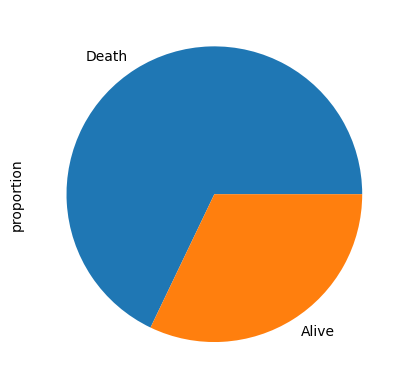

In [850]:
df['Death'].value_counts(normalize=True).plot(kind='pie')
plt.show()

In [851]:
df['smoking'].unique()

array([0, 1], dtype=int64)

In [852]:
df['smoking'].value_counts(normalize=True)

smoking
0    0.67893
1    0.32107
Name: proportion, dtype: float64

In [853]:
df['age'].unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

In [854]:
df['sex'].value_counts()

sex
1    194
0    105
Name: count, dtype: int64

In [855]:

df['gender'] = df['sex'].replace({0: 'Male', 1: 'Female'})



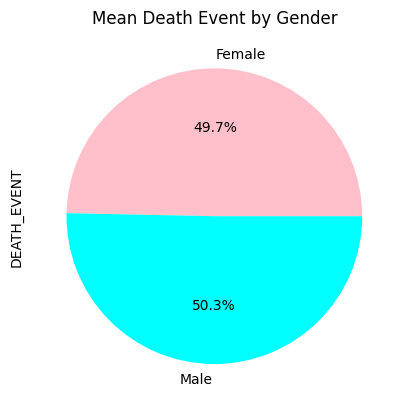

In [856]:

grouped = df.groupby('gender')['DEATH_EVENT'].mean()

# Create a pie chart with custom colors
colors = ['pink', 'cyan']
grouped.plot(kind='pie', colors=colors, autopct='%1.1f%%')

# Customize the plot further if needed
plt.title('Mean Death Event by Gender')

# Show the plot
plt.show()



<Axes: xlabel='gender'>

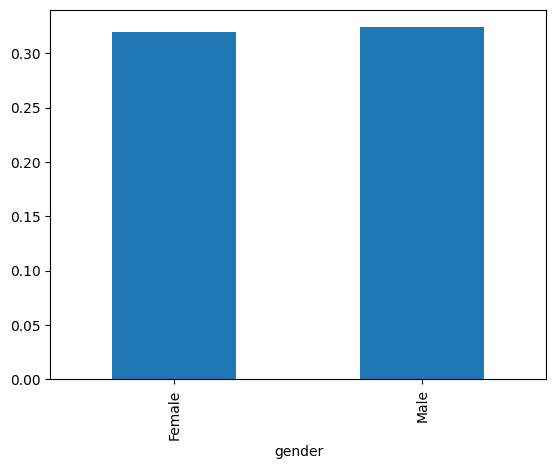

In [857]:
df.groupby('gender')['DEATH_EVENT'].mean().plot(kind='bar')

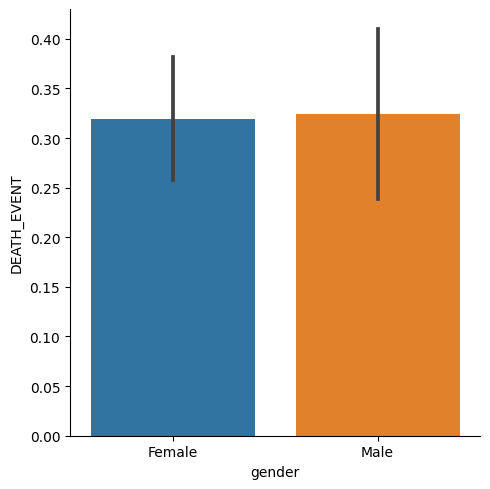

In [858]:
sns.catplot(data=df, y='DEATH_EVENT', x= 'gender', kind='bar')
plt.show()

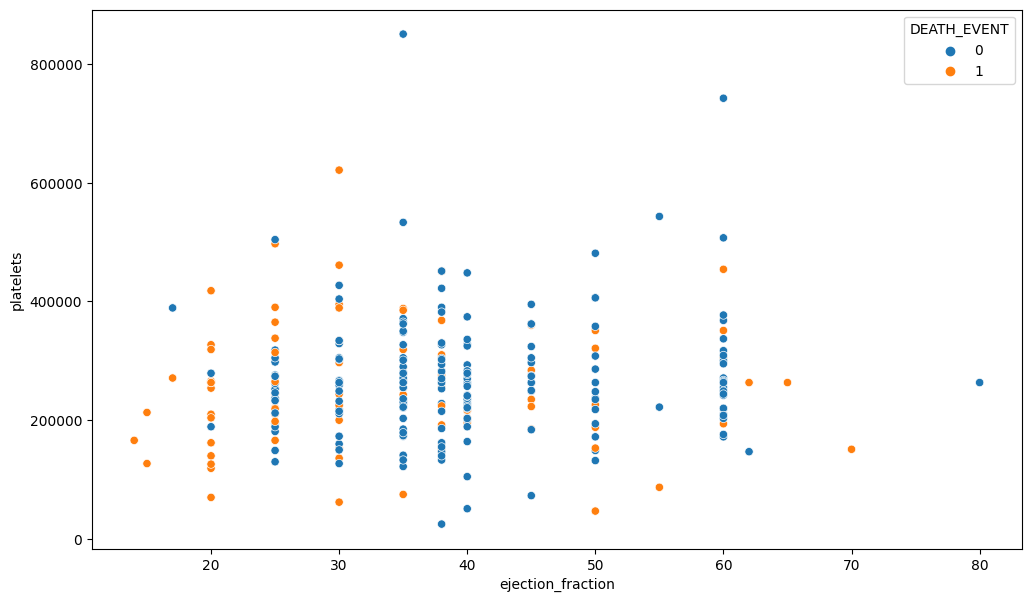

In [859]:
plt.figure(figsize= (12,7))
sns.scatterplot(data=df, y='platelets', x='ejection_fraction', hue='DEATH_EVENT')
plt.show()

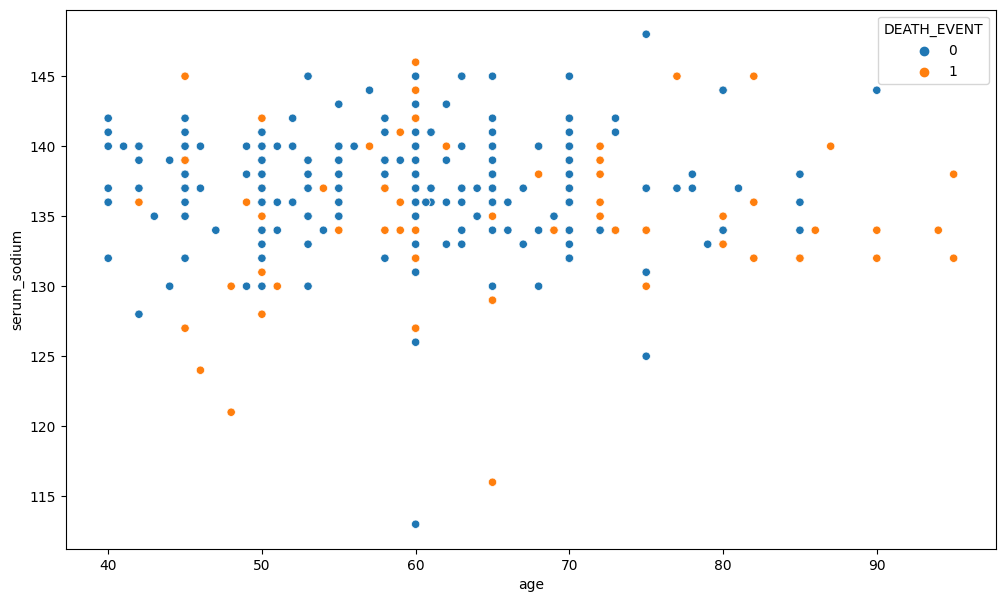

In [860]:
plt.figure(figsize= (12,7))
sns.scatterplot(data=df, y='serum_sodium', x='age', hue='DEATH_EVENT')
plt.show()

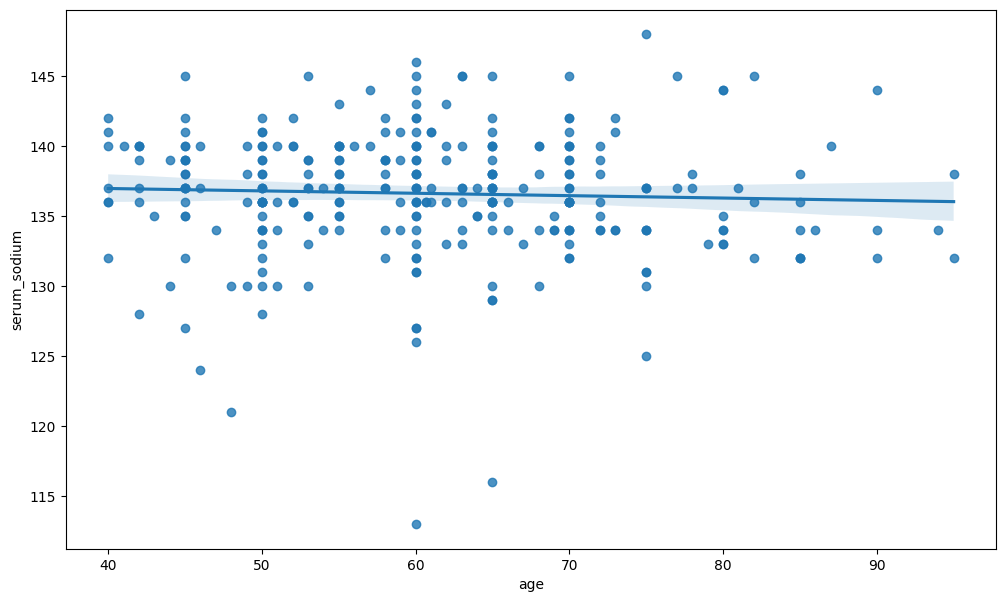

In [861]:
plt.figure(figsize= (12,7))
sns.regplot(data=df, y='serum_sodium', x='age')
plt.show()

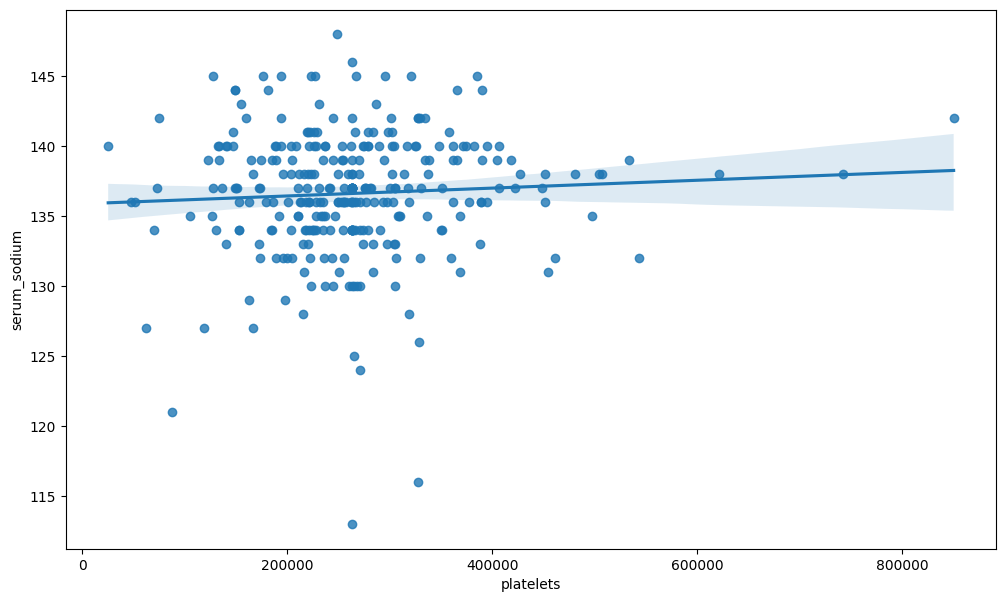

In [862]:
plt.figure(figsize= (12,7))
sns.regplot(data=df, y='serum_sodium', x='platelets')
plt.show()

<Axes: xlabel='age', ylabel='count'>

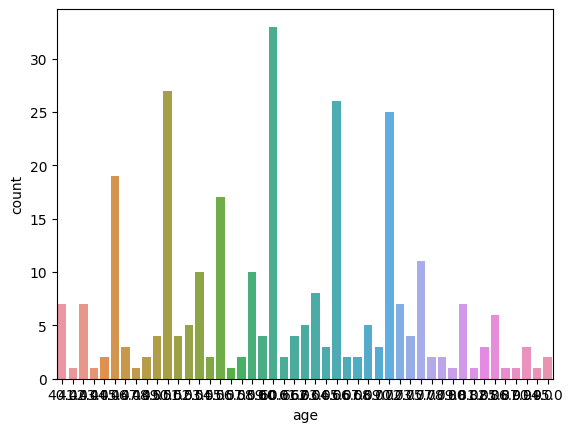

In [863]:
sns.countplot(data=df, x='age')

<Axes: xlabel='diabetes', ylabel='count'>

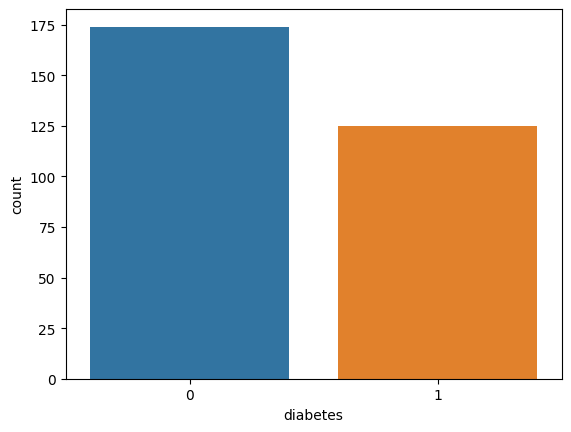

In [864]:
sns.countplot(data=df, x='diabetes')

In [865]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  Death                     299 non-null    object 
 14  gender    

In [866]:
df_count = df.select_dtypes(include=['int64','float'])
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [867]:
df_count = df.drop(['DEATH_EVENT','sex','smoking', 'high_blood_pressure','anaemia','gender','Death'], axis=1)
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   creatinine_phosphokinase  299 non-null    int64  
 2   diabetes                  299 non-null    int64  
 3   ejection_fraction         299 non-null    int64  
 4   platelets                 299 non-null    float64
 5   serum_creatinine          299 non-null    float64
 6   serum_sodium              299 non-null    int64  
 7   time                      299 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 18.8 KB


In [868]:
df_count.corr()

,age,creatinine_phosphokinase,diabetes,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.000000,-0.081584,-0.101012,0.060098,-0.052354,0.159187,-0.045966,-0.224068
creatinine_phosphokinase,-0.081584,1.000000,-0.009639,-0.044080,0.024463,-0.016408,0.059550,-0.009346
diabetes,-0.101012,-0.009639,1.000000,-0.004850,0.092193,-0.046975,-0.089551,0.033726
ejection_fraction,0.060098,-0.044080,-0.004850,1.000000,0.072177,-0.011302,0.175902,0.041729
platelets,-0.052354,0.024463,0.092193,0.072177,1.000000,-0.041198,0.062125,0.010514
serum_creatinine,0.159187,-0.016408,-0.046975,-0.011302,-0.041198,1.000000,-0.189095,-0.149315
serum_sodium,-0.045966,0.059550,-0.089551,0.175902,0.062125,-0.189095,1.000000,0.087640
time,-0.224068,-0.009346,0.033726,0.041729,0.010514,-0.149315,0.087640,1.000000


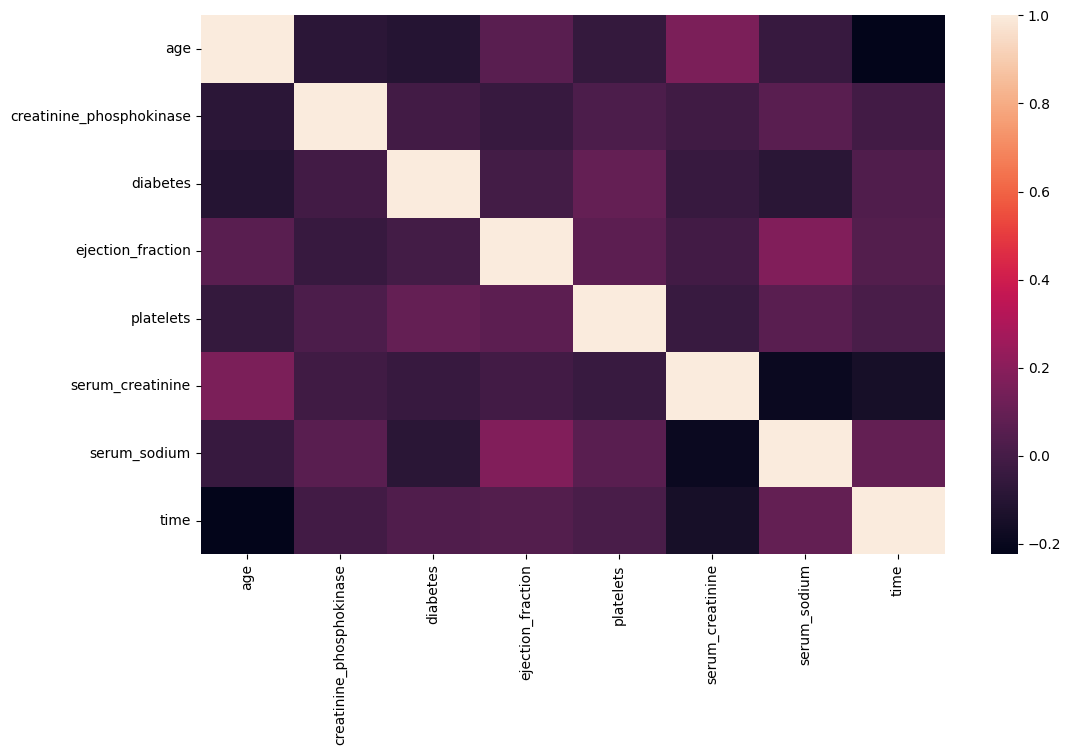

In [869]:
plt.figure(figsize=(12,7))
sns.heatmap(df_count.corr())
plt.show()

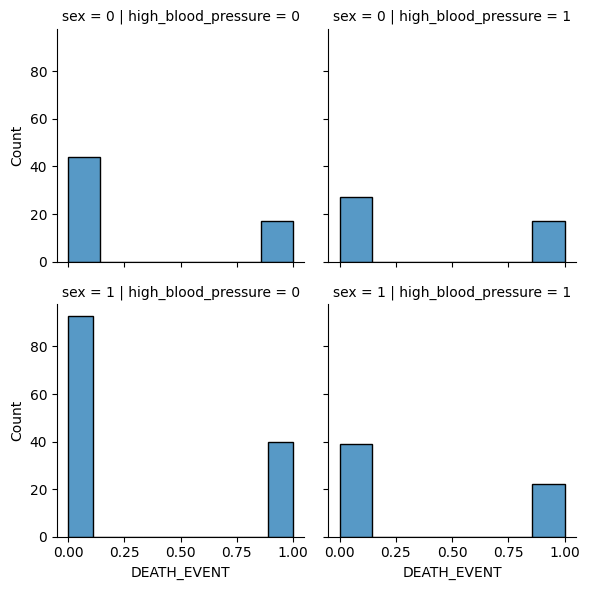

In [870]:
g=sns.FacetGrid(df,row='sex',col='high_blood_pressure')
g.map(sns.histplot,'DEATH_EVENT')
plt.show()

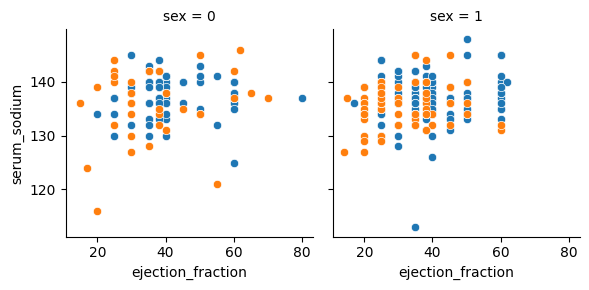

In [871]:
g=sns.FacetGrid(df, hue ='DEATH_EVENT', col='sex')
g.map(sns.scatterplot, 'ejection_fraction', 'serum_sodium')
plt.show()

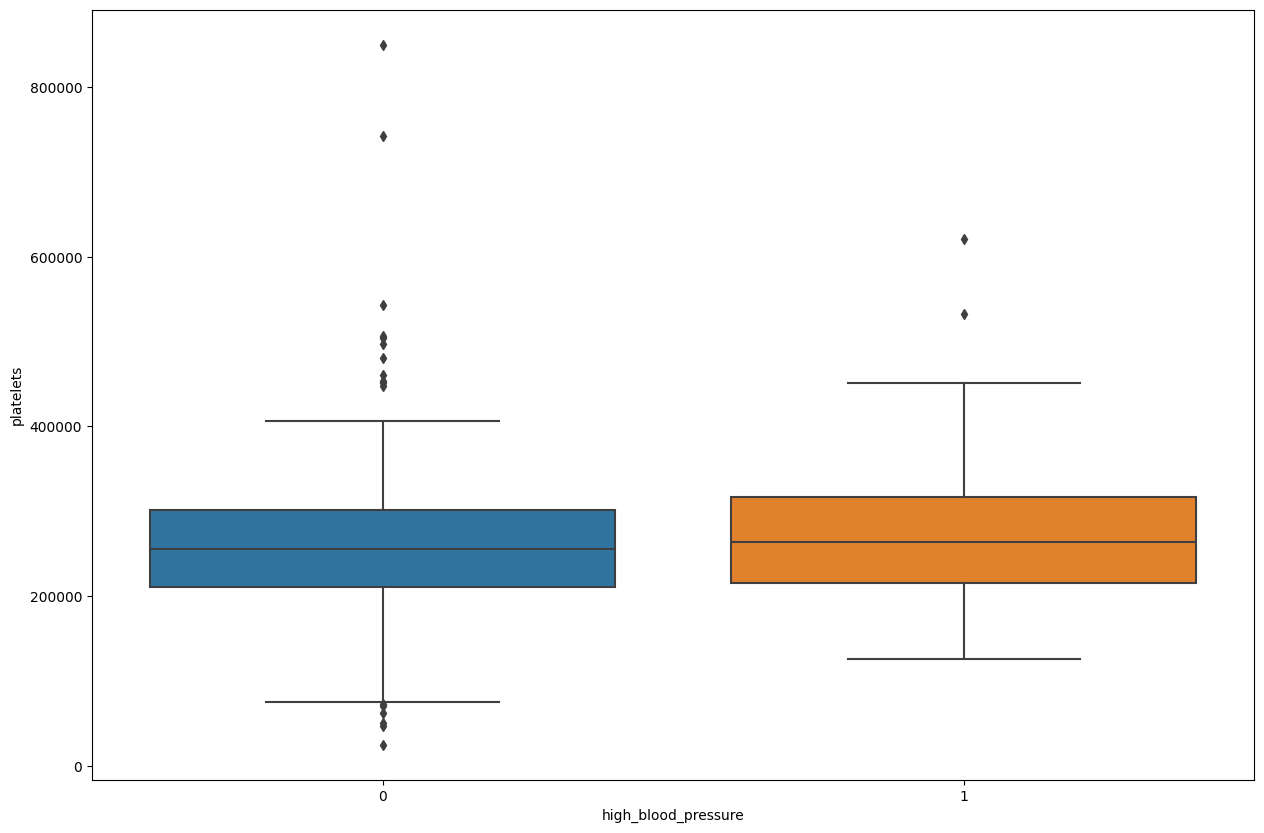

In [872]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = df,x='high_blood_pressure',y='platelets',ax=ax)
plt.show()

Imbalaced Data

In [873]:
df['DEATH_EVENT'].value_counts(normalize=True)

DEATH_EVENT
0    0.67893
1    0.32107
Name: proportion, dtype: float64

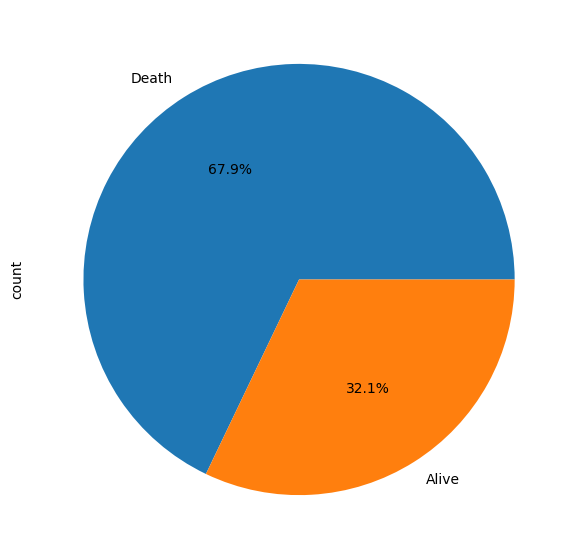

In [874]:
plt.figure(figsize=(10,7))
df['DEATH_EVENT'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['Death','Alive'])
plt.show()

In [875]:
df_count.columns

Index(['age', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
       'platelets', 'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')

Train Model

In [876]:
## splitting the data into dependent and independent variable

X = df_count
y = df['DEATH_EVENT']

SMOTE

In [877]:
os = SMOTE(random_state=0)
X_os,y_os = os.fit_resample(X,y)

In [878]:
X_os.shape, y_os.shape

((406, 8), (406,))

In [879]:

unique, counts = np.unique(y_os, return_counts=True)

for value, count in zip(unique, counts):
    print(f"Value: {value}, Count: {count}")
_

Value: 0, Count: 203
Value: 1, Count: 203


array([inf,  1.,  0.])

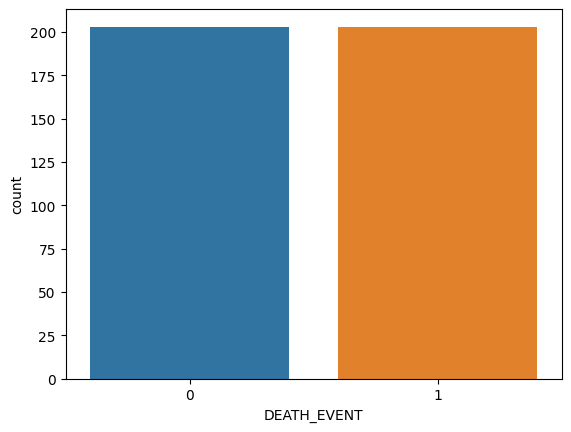

In [880]:
sns.countplot(x=y_os)
plt.show()

In [881]:
df_os = pd.DataFrame(X_os)
df_os['DEATH_EVENT'] = y_os

In [882]:
df_os.columns


Index(['age', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
       'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT'],
      dtype='object')

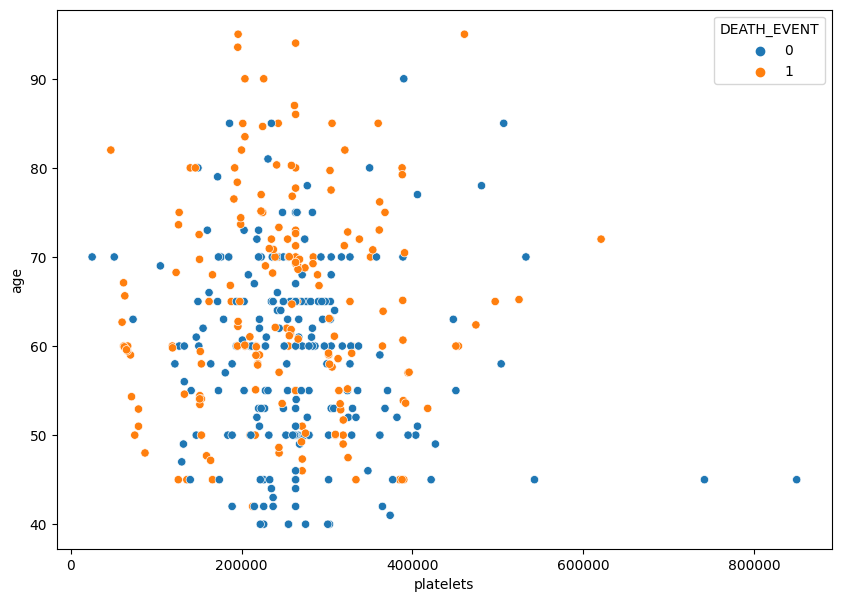

In [883]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_os,x='platelets',y='age',hue='DEATH_EVENT')
plt.show()

In [884]:
## split the data into train test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)

In [885]:
print(X_test.shape)
print(y_test.shape)

(60, 8)
(60,)


In [886]:
#Scale the Data

sc_train = StandardScaler().fit(X_train)
X_train_sc = sc_train.transform(X_train)

In [887]:
print(X_test_sc.shape)
print(y_test.shape)

(60, 8)
(60,)


In [888]:
np.set_printoptions(precision=3)
print(X_train_sc[0:5,:])

[[-0.144 -0.358  1.199 -1.108 -0.749  0.292  0.784 -0.151]
 [ 0.108 -0.501  1.199 -0.264 -0.915 -0.471 -0.168  1.804]
 [ 1.116 -0.505 -0.834 -0.011 -0.418  1.055 -0.644  0.397]
 [-0.648 -0.139 -0.834  2.69  -1.224  7.251  0.07   0.84 ]
 [ 1.704 -0.193 -0.834  1.002 -2.372 -0.089 -0.168 -1.545]]


In [889]:
X_train_sc

array([[-0.144, -0.358,  1.199, ...,  0.292,  0.784, -0.151],
       [ 0.108, -0.501,  1.199, ..., -0.471, -0.168,  1.804],
       [ 1.116, -0.505, -0.834, ...,  1.055, -0.644,  0.397],
       ...,
       [-1.488, -0.522,  1.199, ..., -0.661,  0.546, -0.685],
       [ 0.864, -0.474,  1.199, ..., -0.375, -0.644, -1.285],
       [ 0.948,  0.034, -0.834, ..., -0.089, -0.644,  0.827]])

Logistic Regression Model

In [890]:
#Train the model
model_lr = LogisticRegression(solver='liblinear')

In [891]:
model_lr.fit(X_train_sc,y_train)

LogisticRegression(solver='liblinear')

In [892]:
# scale
sc_test = StandardScaler().fit(X_test)
X_test_sc = sc_test.transform(X_test)

In [894]:
LR_pred0 = model_lr.predict(X_test_sc)

In [895]:
pd.DataFrame({'Actual': y_test, 'Predicted': LR_pred0})

,Actual,Predicted
109,0,0
264,0,0
285,0,0
19,1,1
123,0,0
242,0,0
103,0,0
296,0,0
204,0,0
115,0,0


In [897]:
## model evaluation
accuracy_LR = accuracy_score(y_test, LR_pred0 )

## confusion matrix
conf_mat = confusion_matrix(y_test, LR_pred0)


print(accuracy_LR)
print(conf_mat)

0.85
[[37  4]
 [ 5 14]]


In [898]:
## classification report
print(classification_report(y_test, LR_pred0))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



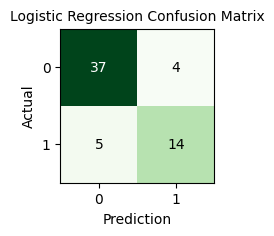

In [899]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Logistic Regression Confusion Matrix', fontsize = 10)
plt.show()

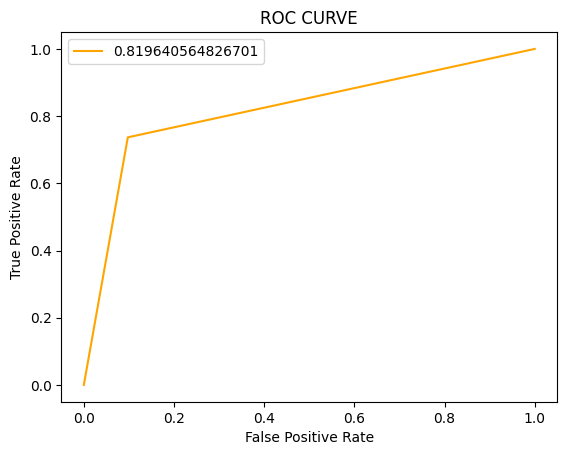

In [900]:
auc_LR = roc_auc_score(y_test, LR_pred0)
fpr, tpr, _ = roc_curve(y_test, LR_pred0)
plt.plot(fpr, tpr, color = 'orange', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend()
plt.show()

In [796]:
results = model_lr.score(X_test_sc,y_test)
results*100

85.0

In [797]:
results = model_lr.score(X_train_sc, y_train)
results*100

83.68200836820083

In [798]:
print(X_test_sc.shape)
print(y_test.shape)

(60, 8)
(60,)


Model Optimisation

In [799]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   creatinine_phosphokinase  299 non-null    int64  
 2   diabetes                  299 non-null    int64  
 3   ejection_fraction         299 non-null    int64  
 4   platelets                 299 non-null    float64
 5   serum_creatinine          299 non-null    float64
 6   serum_sodium              299 non-null    int64  
 7   time                      299 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 18.8 KB


In [800]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  Death                     299 non-null    object 
 14  gender    

In [801]:
# Add the categorical variabes to the dataframe
df_count['anaemia']=df['anaemia']
df_count['high_blood_pressure']=df['high_blood_pressure']
df_count['smoking']=df['smoking']
df_count['sex']=df['sex']



In [802]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   creatinine_phosphokinase  299 non-null    int64  
 2   diabetes                  299 non-null    int64  
 3   ejection_fraction         299 non-null    int64  
 4   platelets                 299 non-null    float64
 5   serum_creatinine          299 non-null    float64
 6   serum_sodium              299 non-null    int64  
 7   time                      299 non-null    int64  
 8   anaemia                   299 non-null    int64  
 9   high_blood_pressure       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  sex                       299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


<Axes: title={'center': 'Correlation with Death Event'}>

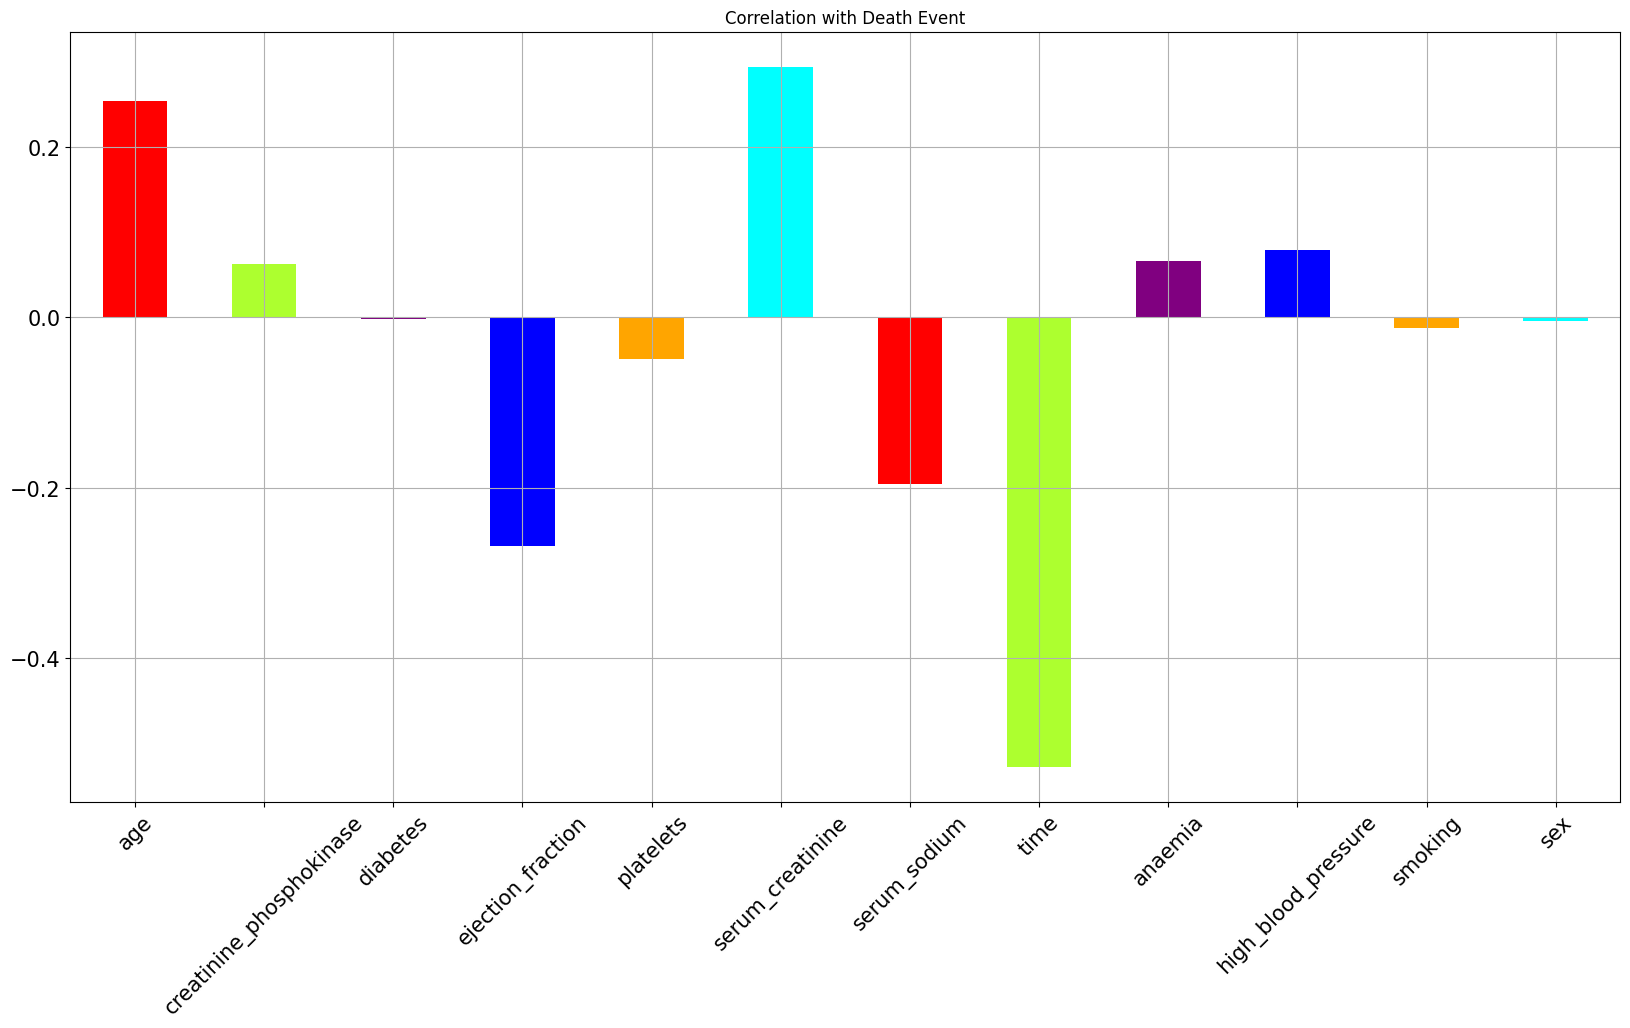

In [803]:
c=['red','green''yellow','purple','blue','orange','cyan']
df_count.corrwith(df['DEATH_EVENT']).plot.bar(figsize=(20,10),
                                                    title= 'Correlation with Death Event',
                                                    fontsize = 15, rot=45, grid=True, color=c)

In [804]:
X1=df_count
X1.shape

(299, 12)

In [805]:
y1=df['DEATH_EVENT']

SMOTE

In [806]:
os = SMOTE(random_state=0)
X1_os,y1_os = os.fit_resample(X1,y1)

In [807]:
## split the data into train test and split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_os, y1_os, test_size=0.20, random_state=32)

In [808]:
lr_1 = LogisticRegression(solver='liblinear')

In [809]:
sc_train = StandardScaler().fit(X1_train)
X1_train_sc = sc_train.transform(X1_train)

In [811]:
sc_train = StandardScaler().fit(X1_test)
X1_test_sc = sc_train.transform(X1_test)

In [810]:
lr_1.fit(X1_train_sc, y1_train)

LogisticRegression(solver='liblinear')

In [821]:
LR_pred = lr_1.predict(X1_test_sc)

In [823]:
pd.DataFrame({'Actual': y1_test, 'Predicted': LR_pred})

,Actual,Predicted
137,0,1
170,0,0
144,1,1
182,1,0
39,1,1
...,...,...
233,0,0
294,0,0
127,0,0
288,0,0


In [825]:
## model evaluation
accuracy_LR = accuracy_score(y1_test, LR_pred )

## confusion matrix
conf_mat = confusion_matrix(y1_test, LR_pred)


print(accuracy_LR)
print(conf_mat)

0.8170731707317073
[[33  6]
 [ 9 34]]


In [826]:
## classification report
print(classification_report(y1_test, LR_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        39
           1       0.85      0.79      0.82        43

    accuracy                           0.82        82
   macro avg       0.82      0.82      0.82        82
weighted avg       0.82      0.82      0.82        82



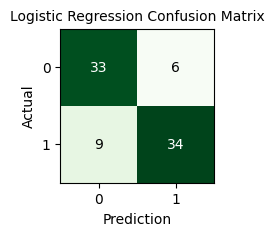

In [827]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Logistic Regression Confusion Matrix', fontsize = 10)
plt.show()

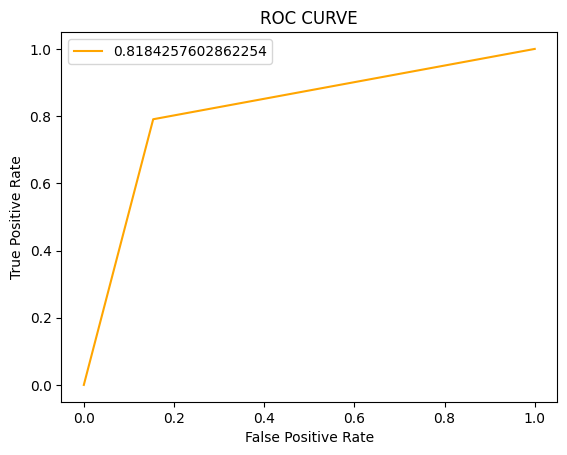

In [829]:
auc_LR = roc_auc_score(y1_test, LR_pred)
fpr, tpr, _ = roc_curve(y1_test, LR_pred)
plt.plot(fpr, tpr, color = 'orange', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend()
plt.show()

Artificial Neural Network

In [908]:
## initialize the neural network
model = Sequential()

## input layers
model.add(Dense(units= 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))

## hidden layer
model.add(Dense(units= 8, kernel_initializer = 'uniform', activation = 'relu'))

## regularization
model.add(Dropout(0.25))

## output layer

model.add(Dense(units= 1,kernel_initializer = 'uniform', activation = 'sigmoid'))

In [909]:
## compile the network
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [910]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                144       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [911]:
## train the network
history = model.fit(X_train_sc, y_train, batch_size = 25, epochs = 20, validation_data=(X_test_sc, y_test))

Epoch 1/20


10/10 [==============================] - 4s 118ms/step - loss: 0.6923 - accuracy: 0.6611 - val_loss: 0.6913 - val_accuracy: 0.6833
Epoch 2/20
10/10 [==============================] - 0s 23ms/step - loss: 0.6903 - accuracy: 0.6778 - val_loss: 0.6889 - val_accuracy: 0.6833
Epoch 3/20
10/10 [==============================] - 0s 18ms/step - loss: 0.6878 - accuracy: 0.6778 - val_loss: 0.6860 - val_accuracy: 0.6833
Epoch 4/20
10/10 [==============================] - 0s 20ms/step - loss: 0.6842 - accuracy: 0.6778 - val_loss: 0.6817 - val_accuracy: 0.6833
Epoch 5/20
10/10 [==============================] - 0s 20ms/step - loss: 0.6782 - accuracy: 0.6778 - val_loss: 0.6752 - val_accuracy: 0.6833
Epoch 6/20
10/10 [==============================] - 0s 24ms/step - loss: 0.6700 - accuracy: 0.6778 - val_loss: 0.6653 - val_accuracy: 0.6833
Epoch 7/20
10/10 [==============================] - 0s 25ms/step - loss: 0.6583 - accuracy: 0.6778 - val_loss: 0.6521 - val_accuracy: 0.6833
Epoch 8/20
10/10 [=====

In [912]:
## save my model
#model.save('ann_model')

INFO:tensorflow:Assets written to: ann_model\assets


INFO:tensorflow:Assets written to: ann_model\assets


In [913]:
## load saved model
ann_model = tf.keras.models.load_model('ann_model')

In [914]:
## make prediction on test data
y_pred_ann = ann_model.predict(X_test_sc)
y_pred_ann

2/2 [==============================] - 1s 7ms/step


array([[0.322],
       [0.065],
       [0.062],
       [0.516],
       [0.197],
       [0.046],
       [0.306],
       [0.013],
       [0.144],
       [0.174],
       [0.117],
       [0.511],
       [0.558],
       [0.631],
       [0.223],
       [0.085],
       [0.463],
       [0.139],
       [0.334],
       [0.248],
       [0.517],
       [0.543],
       [0.136],
       [0.135],
       [0.418],
       [0.124],
       [0.091],
       [0.585],
       [0.433],
       [0.308],
       [0.552],
       [0.111],
       [0.612],
       [0.218],
       [0.617],
       [0.085],
       [0.057],
       [0.072],
       [0.036],
       [0.604],
       [0.598],
       [0.479],
       [0.094],
       [0.083],
       [0.664],
       [0.162],
       [0.588],
       [0.692],
       [0.05 ],
       [0.053],
       [0.232],
       [0.232],
       [0.07 ],
       [0.033],
       [0.13 ],
       [0.03 ],
       [0.132],
       [0.59 ],
       [0.573],
       [0.569]], dtype=float32)

In [916]:
## set a threshold
y_pred_ann = np.where(y_pred_ann > 0.5, 1,0)

In [917]:
## flatten
y_pred_ann = y_pred_ann.flatten()

In [918]:
## put in a dataframe
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann})

,Actual,Predicted
109,0,0
264,0,0
285,0,0
19,1,1
123,0,0
242,0,0
103,0,0
296,0,0
204,0,0
115,0,0


In [919]:
## classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.72      0.68      0.70        19

    accuracy                           0.82        60
   macro avg       0.79      0.78      0.79        60
weighted avg       0.81      0.82      0.82        60



In [920]:
## confusion matrix
cm = confusion_matrix(y_test, y_pred_ann)
cm

array([[36,  5],
       [ 6, 13]], dtype=int64)

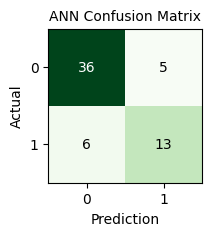

In [921]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(cm, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('ANN Confusion Matrix', fontsize = 10)
plt.show()

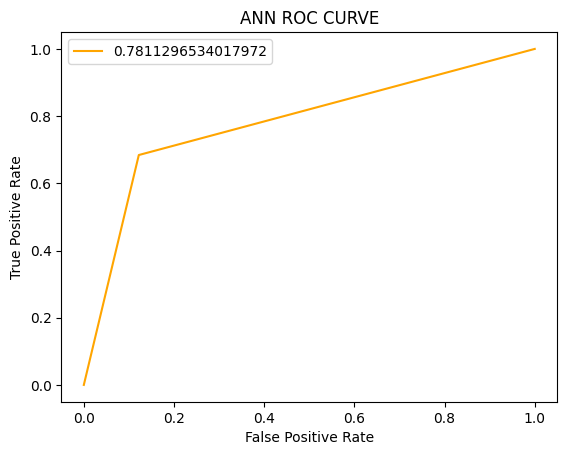

In [922]:
auc_ann = roc_auc_score(y_test, y_pred_ann)
fpr, tpr, _ = roc_curve(y_test, y_pred_ann)
plt.plot(fpr, tpr, color = 'orange', label = auc_ann)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC CURVE')
plt.legend()
plt.show()

Random Forest Model

In [926]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf_model.fit(X_train_sc, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [927]:
## Make predictions
y_pred_rf = rf_model.predict(X_test_sc)

In [928]:
## Put the predictions in a dataframe
rf_model_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
rf_model_output

,Actual,Predicted
109,0,0
264,0,0
285,0,0
19,1,1
123,0,0
242,0,0
103,0,0
296,0,0
204,0,0
115,0,0


In [929]:
## Evaluating model accuracy
accuracy_RF = accuracy_score(y_test, y_pred_rf)

## Confusion matrix
conf_mat_RF = confusion_matrix(y_test, y_pred_rf)

print(accuracy_RF)
print(conf_mat)

0.8666666666666667
[[37  4]
 [ 5 14]]


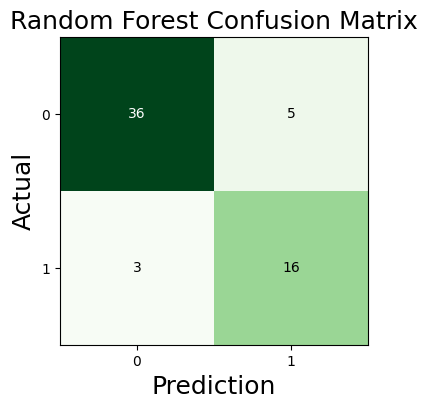

In [930]:
## Confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_RF, figsize=(4,4), cmap=plt.cm.Greens)

plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Random Forest Confusion Matrix', fontsize=18)
plt.show()

In [931]:
auc_RF = roc_auc_score(y_test, y_pred_rf)
print(r'AUC: ',auc_RF)

AUC:  0.8600770218228497


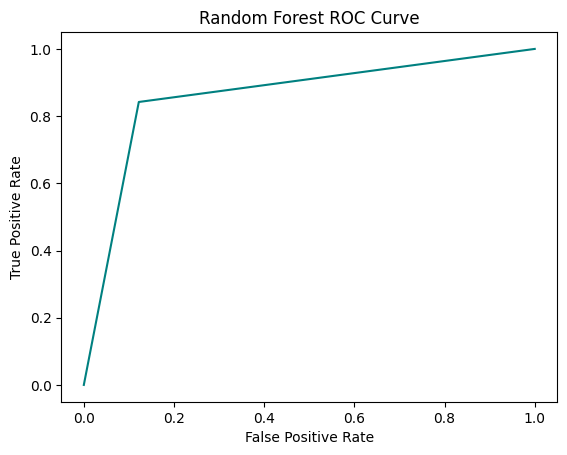

In [932]:
# false positive & true positive rate
# underscore ignores the value:"_"
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr, color = 'teal', label = auc_RF)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()